In [53]:
import numpy as np

import thinkstats2
import thinkplot
import nsfg

### Histograms

In [15]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [16]:
hist.Freq(2)

2

In [17]:
hist[2]

2

In [18]:
hist.Freq(4)

0

In [19]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [20]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [21]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


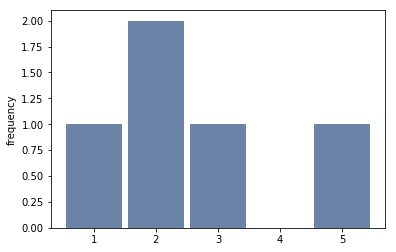

In [22]:
thinkplot.Hist(hist)
thinkplot.Show(xlable='value', ylabel='frequency')

### NSFG variables

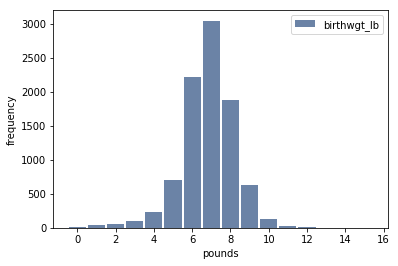

In [23]:
preg = nsfg.ReadFemPreg(dct_file='data/2002FemPreg.dct', dat_file='data/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

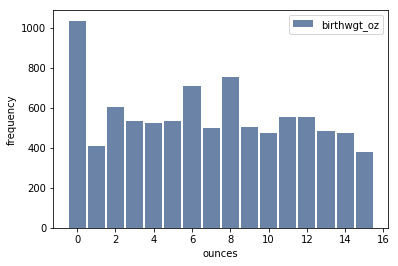

In [26]:
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='ounces', ylabel='frequency')

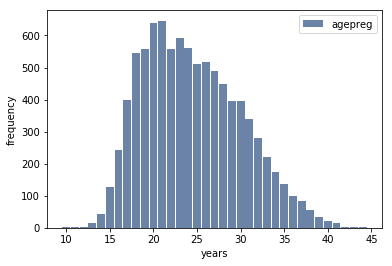

In [59]:
ages = np.floor(live.agepreg)
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='years', ylabel='frequency')

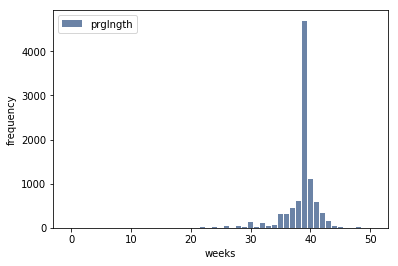

In [33]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='weeks', ylabel='frequency')
thinkplot.Clf()

### Outliers

In [35]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')

for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [38]:
for weeks, freq in sorted(hist.Largest(10)):
    print(weeks, freq)

40 1116
41 587
42 328
43 148
44 46
45 10
46 1
47 1
48 7
50 2


### First babies

In [40]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

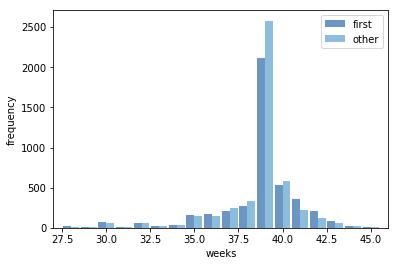

In [43]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, label='first')
thinkplot.Hist(other_hist, align='left', width=width, label='other')
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27, 46])

### Variance

In [44]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print(mean, var, std)

38.56055968517709 7.302662067826851 2.702343810070593


In [61]:
print(var, np.square(std))

7.302662067826851 7.302662067826851


### Effect size

Effect Size: a summary statistic intended to describe the size of an effect

In [48]:
# To describe the difference between two groups, one obvious choice is the difference in the means

first_mean = firsts.prglngth.mean()
others_mean = others.prglngth.mean()

mean_diff = np.abs(first_mean - others_mean)

mean_diff_percent = mean_diff / mean

print(first_mean, others_mean)
print(mean_diff, mean_diff_percent)

38.60095173351461 38.52291446673706
0.07803726677754952 0.0020237586646738304


In [54]:
# Another way: Cohen's d

def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    
    return d

In [55]:
cohen_effect_size(firsts.prglngth, others.prglngth)

0.028879044654449883

### Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [62]:
cohen_effect_size(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [64]:
resp = nsfg.ReadFemResp(dct_file='data/2002FemResp.dct', dat_file='data/2002FemResp.dat.gz')

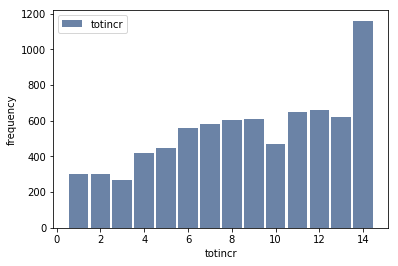

In [65]:
hist = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='totincr', ylabel='frequency')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

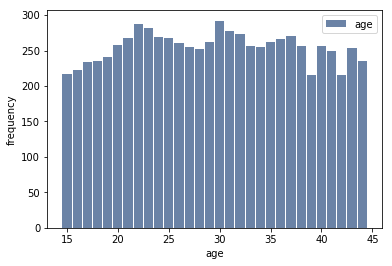

In [66]:
hist = thinkstats2.Hist(resp.age_r, label='age')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='age', ylabel='frequency')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

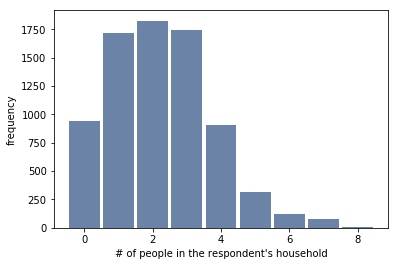

In [67]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist)
thinkplot.Show(xlabel='# of people in the respondent\'s household', ylabel='frequency')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

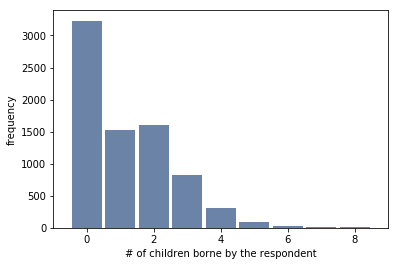

In [75]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist)
thinkplot.Show(xlabel='# of children borne by the respondent', ylabel='frequency', xlim=[-1, 9])

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [77]:
parity = thinkstats2.Hist(resp.parity)
parity.Largest(1)[0][0]

22

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

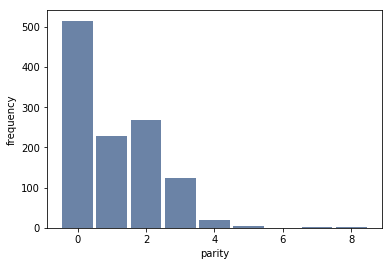

In [78]:
high_income = resp[resp.totincr == 14]

hist = thinkstats2.Hist(high_income.parity)
thinkplot.Hist(hist)
thinkplot.Show(xlabel='parity', ylabel='frequency')

Find the largest parities for high income respondents.

In [79]:
hist.Largest(1)[0][0]

8

Compare the mean <tt>parity</tt> for high income respondents and others.

In [80]:
others_income = resp[resp.totincr != 14]

print(high_income.parity.mean(), others_income.parity.mean())

1.0758620689655172 1.2495758136665125


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [82]:
cohen_effect_size(high_income.parity, others_income.parity)

-0.1251185531466061